# In this notebook:
## We present the baseline model employing Linear Regression while creating relevant plots to visualize model learning and performance

Note: Be mindful of which city data you're feeding into this model (and checking whether it has lagged values present or not, since it's presence leads to high accuracy) and according to the city dataset size adjust the n_spilts for TimeSeriesSplit (5 splits for 1000+ rows and 10 for <1000)


Linear Regression - Fold 1
RMSE: 51.86
MSE: 2689.78
MAE: 40.65
R²: 0.78


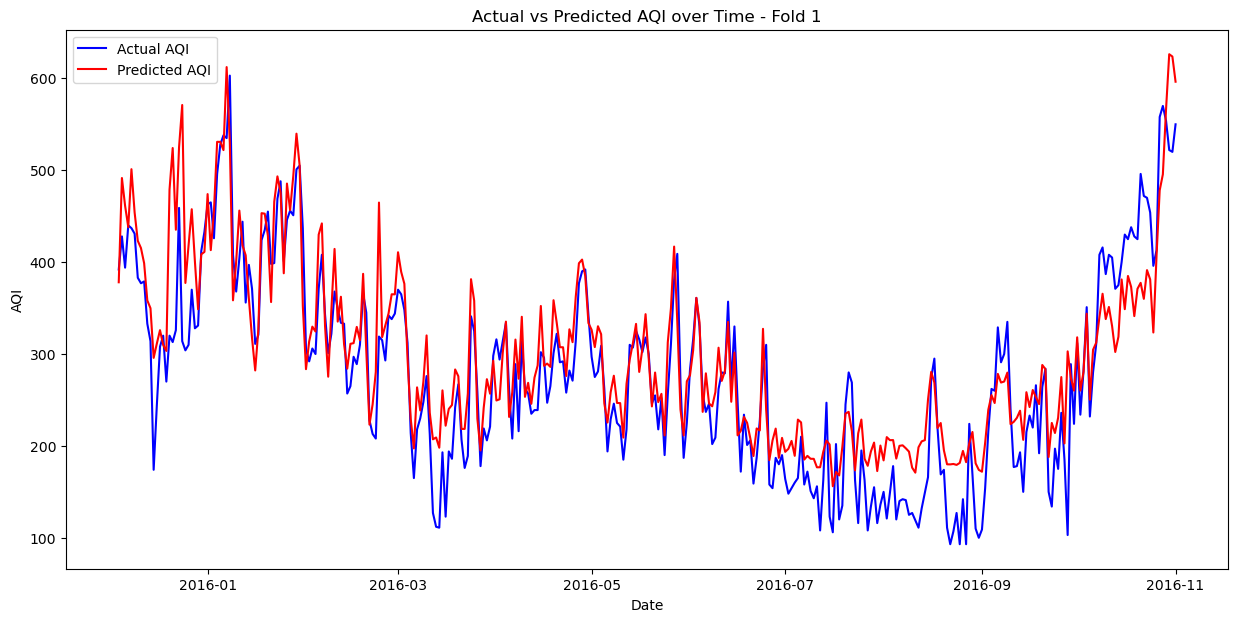

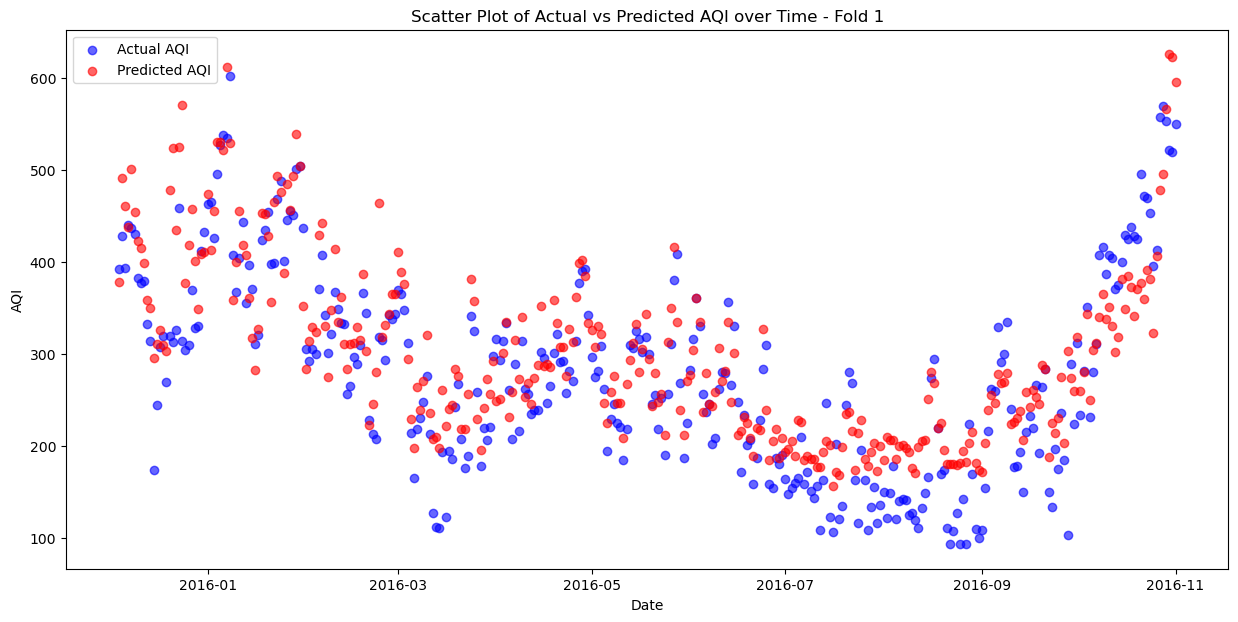


Linear Regression - Fold 2
RMSE: 73.55
MSE: 5409.08
MAE: 60.82
R²: 0.77


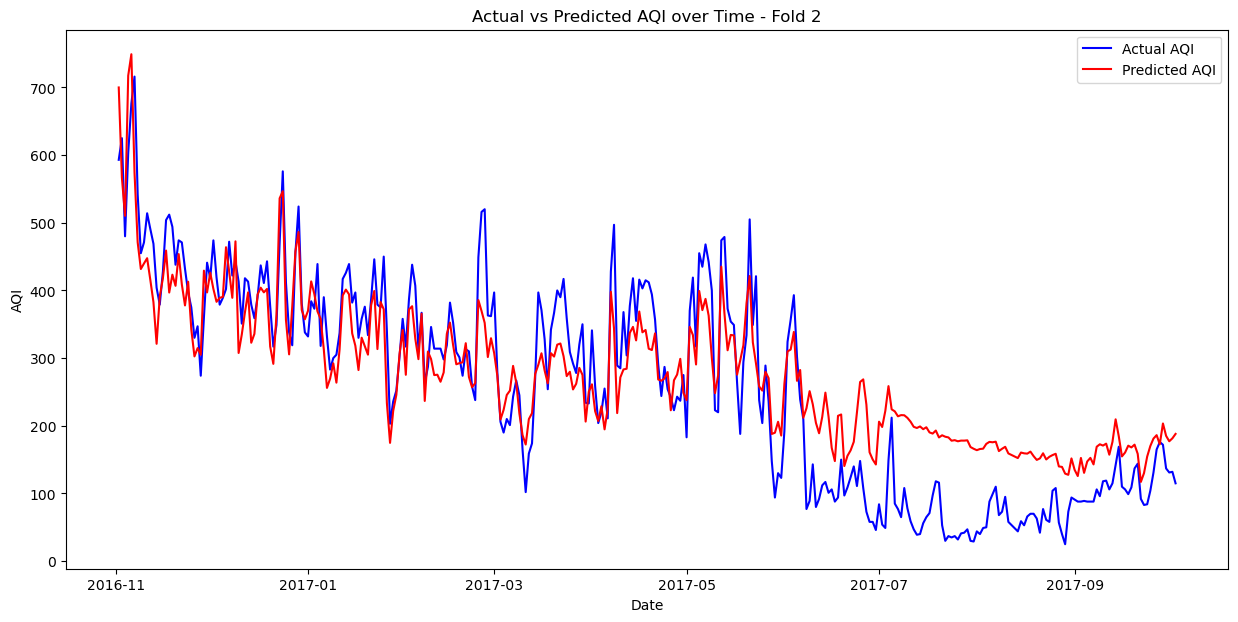

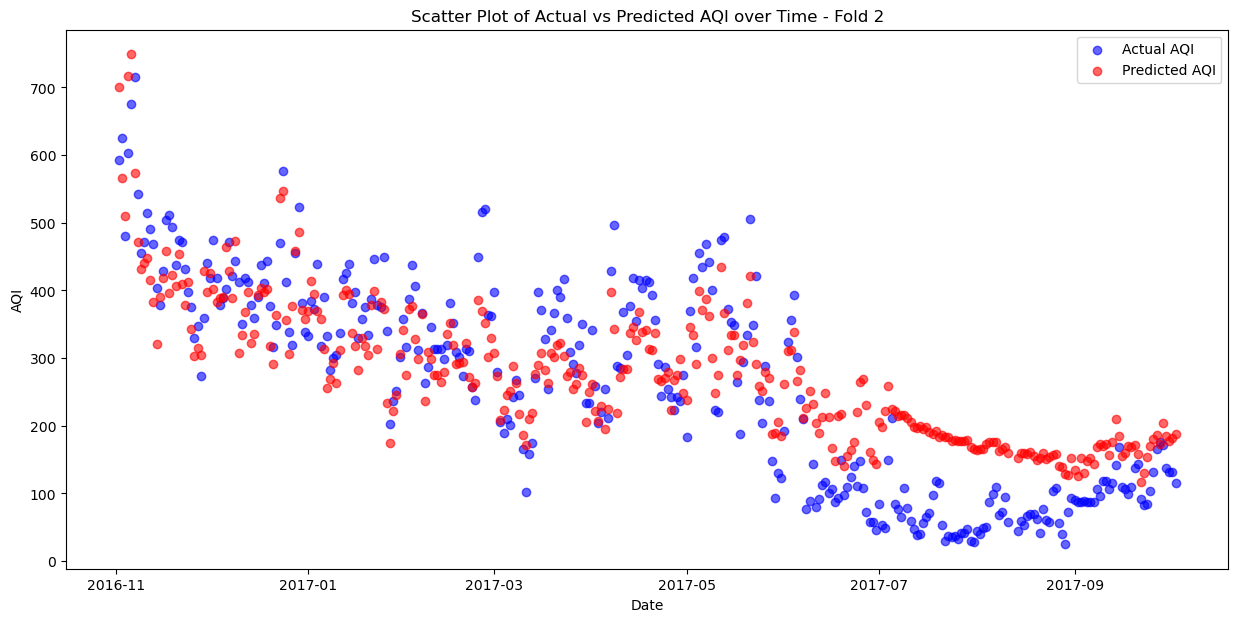


Linear Regression - Fold 3
RMSE: 38.11
MSE: 1452.44
MAE: 28.10
R²: 0.89


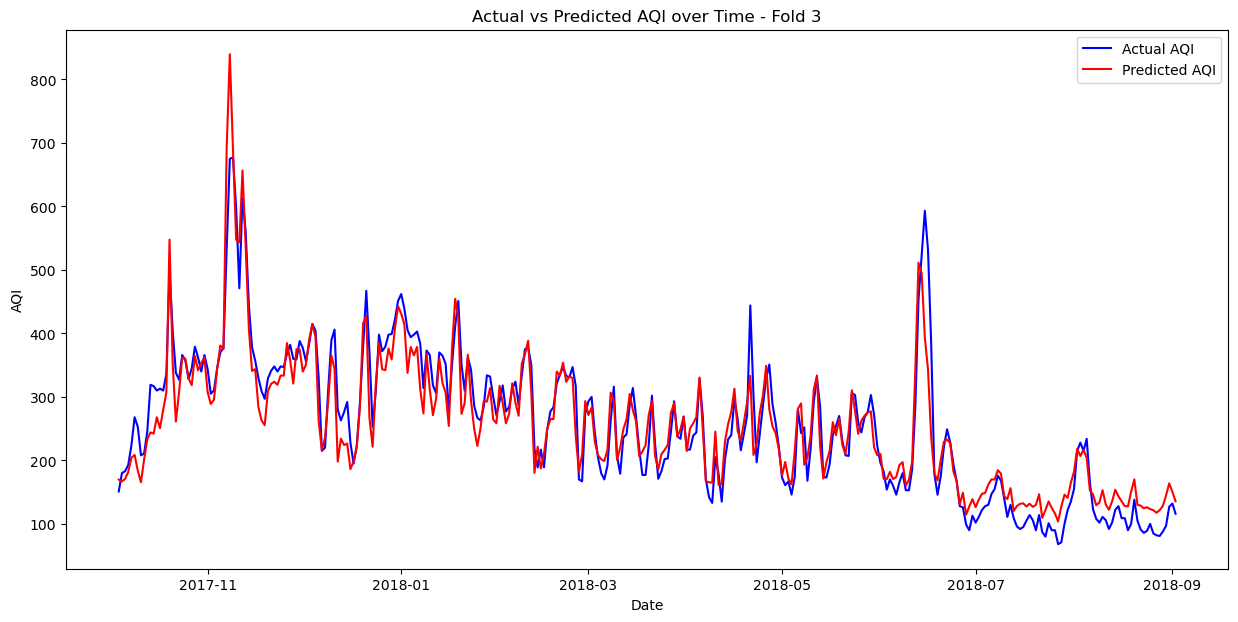

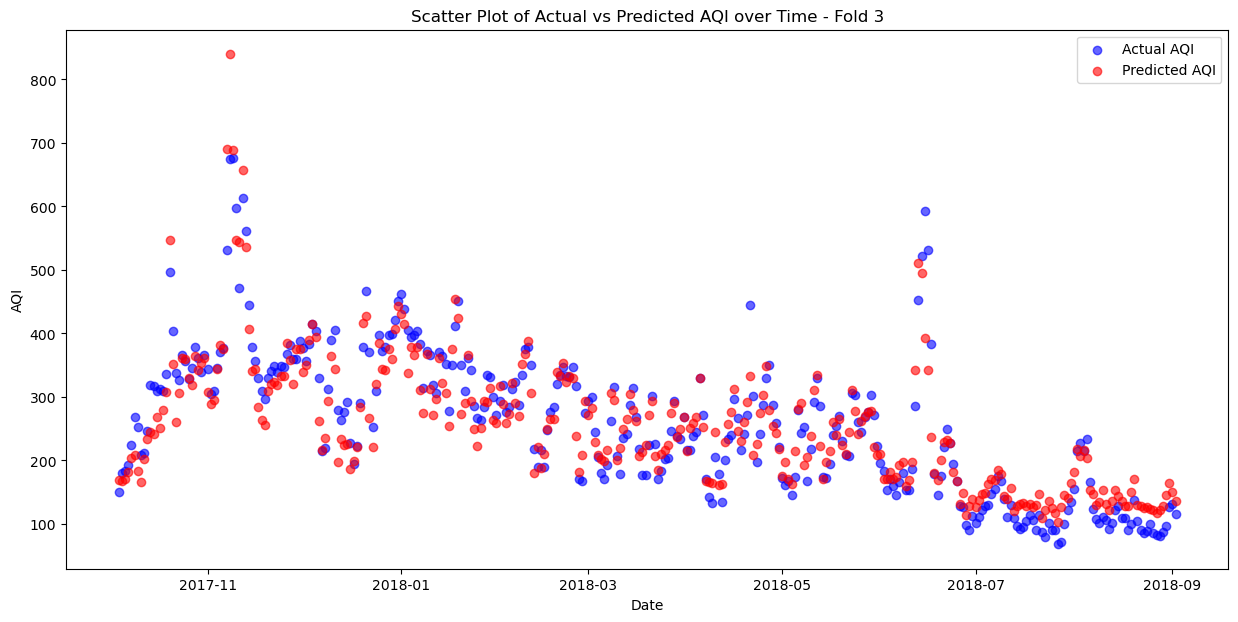


Linear Regression - Fold 4
RMSE: 36.98
MSE: 1367.84
MAE: 30.18
R²: 0.89


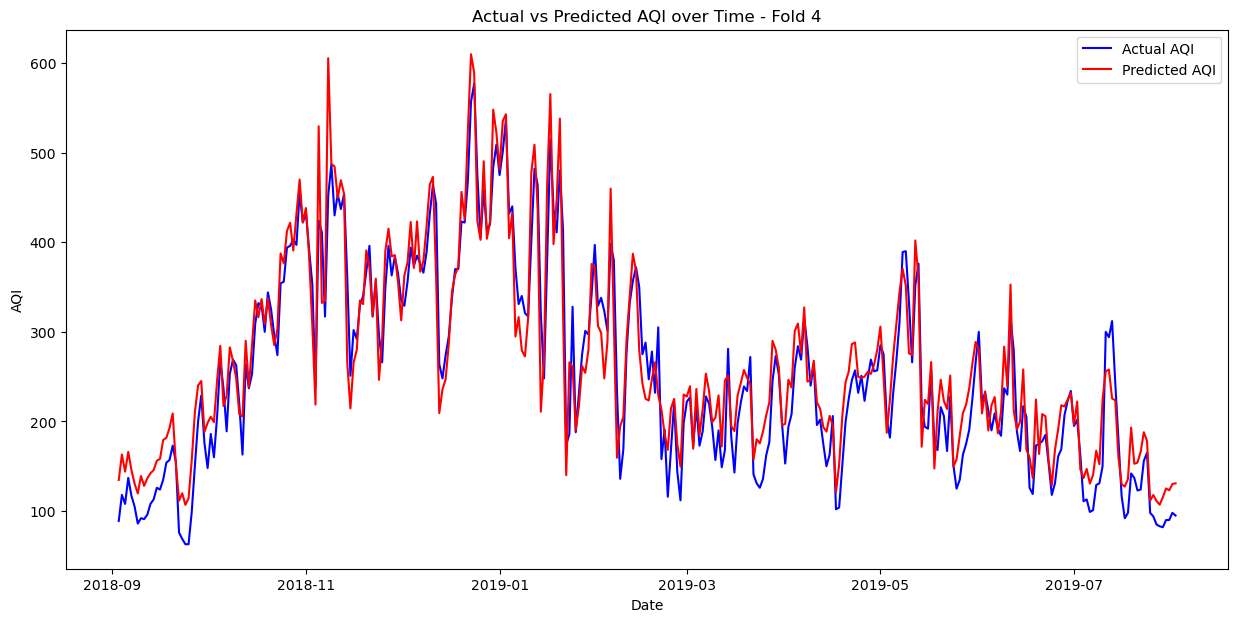

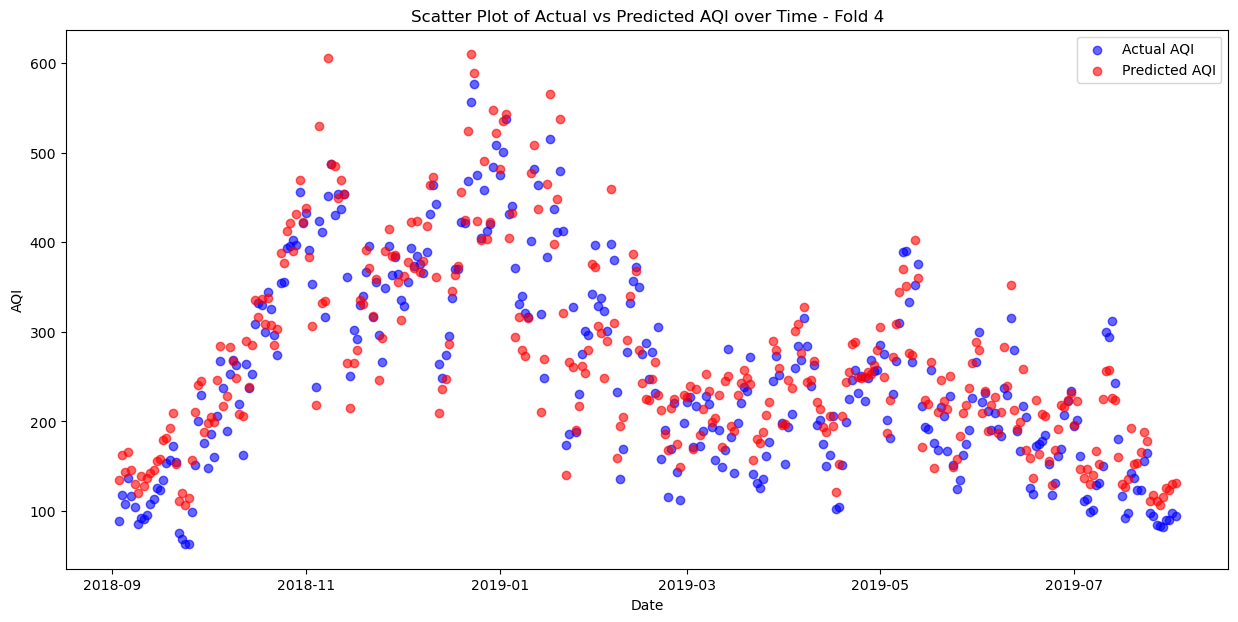


Linear Regression - Fold 5
RMSE: 38.72
MSE: 1498.95
MAE: 32.48
R²: 0.90


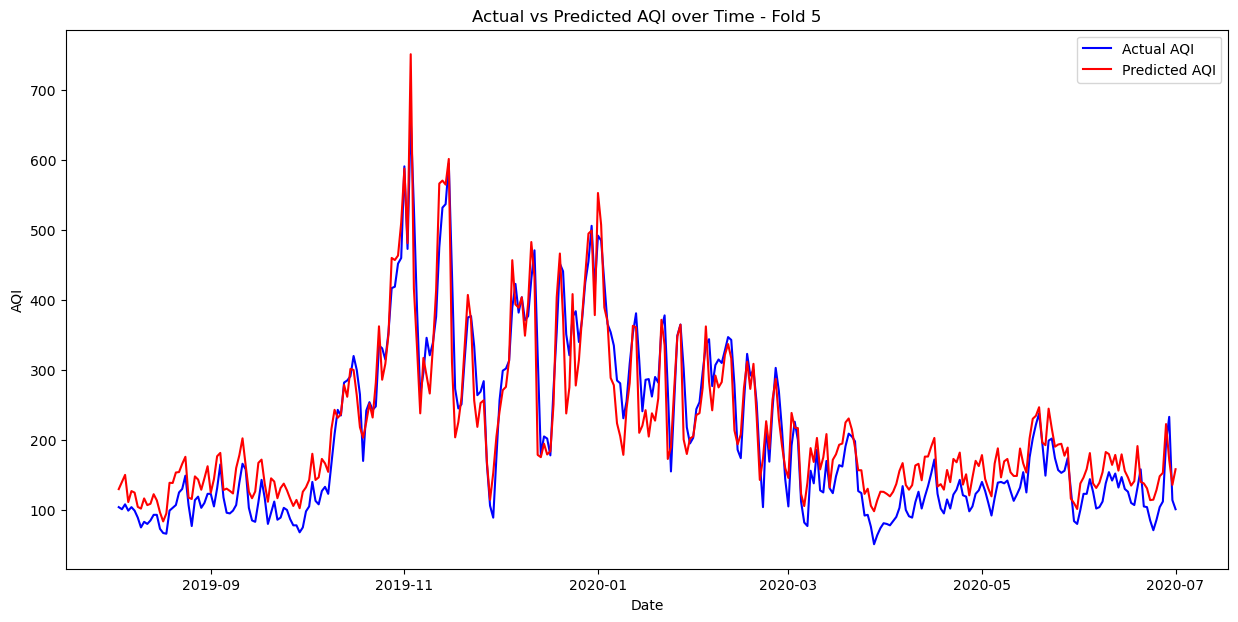

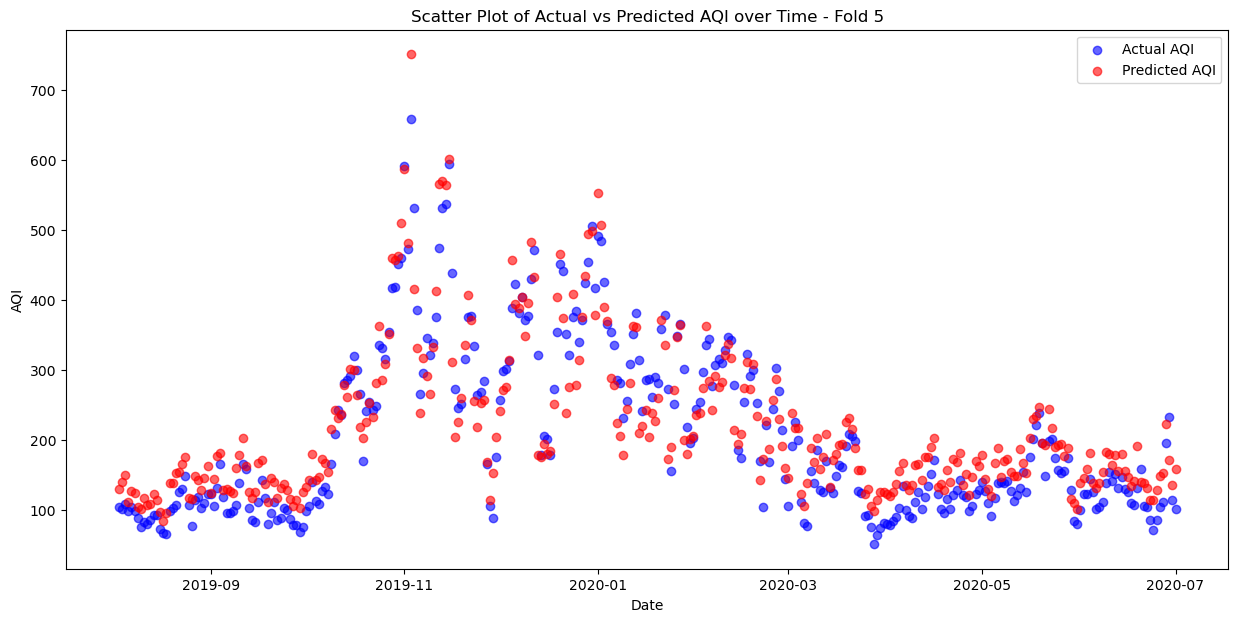

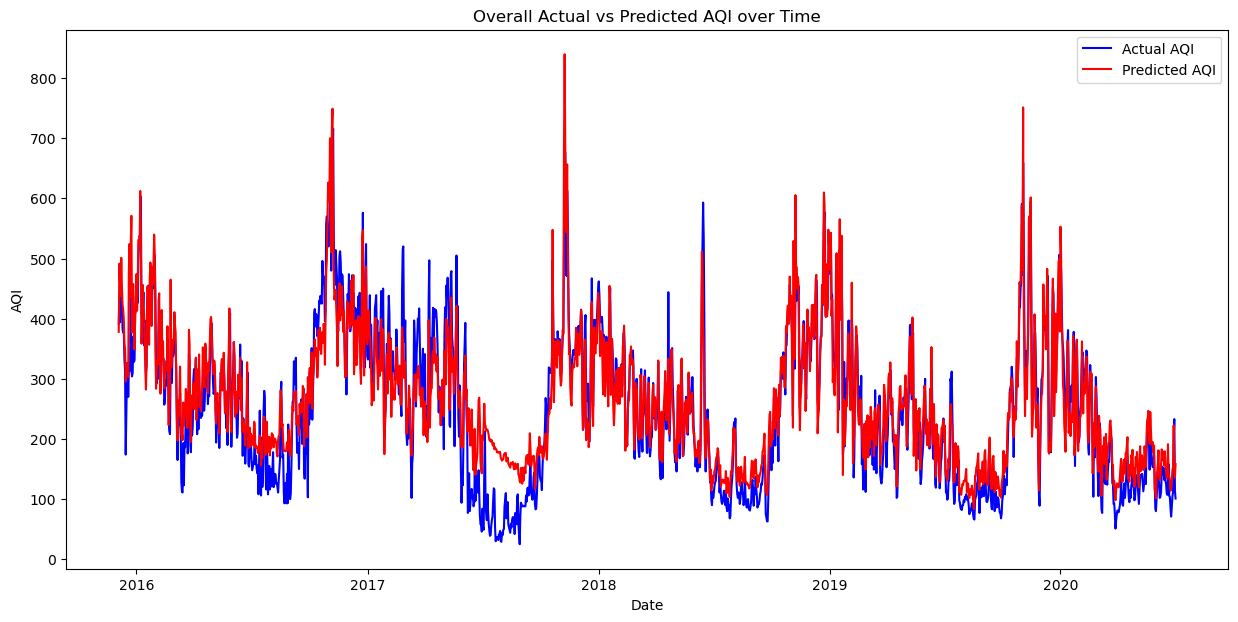

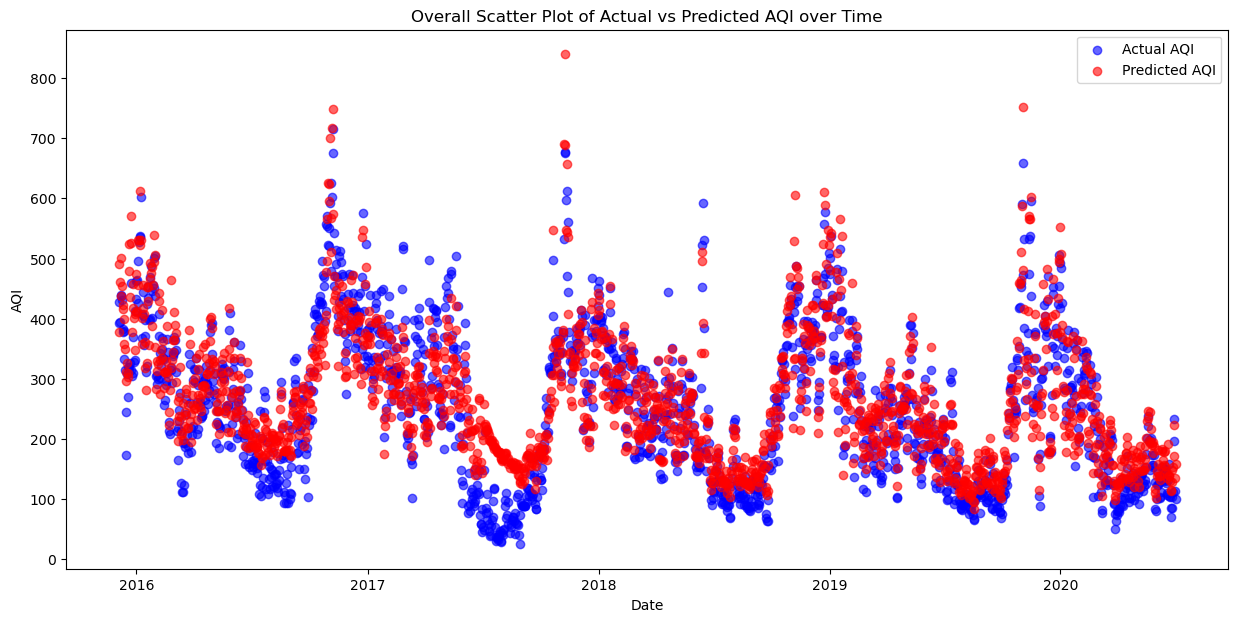

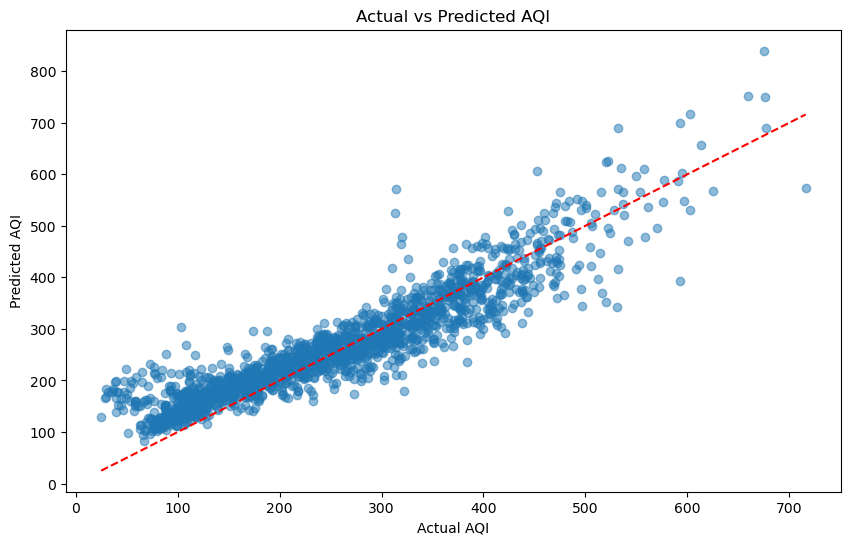

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import matplotlib.dates as mdates


# Load and preprocess data
df = pd.read_csv(r"I:\My Drive\Data Science\Sri Vipra\Code\Cities Seperated\Delhi_data.csv", parse_dates=['Date'])
df = df.drop(columns=['AQI_Bucket', 'City'])
df = df.interpolate(method='linear')
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Separate features and target
X = df.drop(['AQI', 'Date'], axis=1).values
y = df['AQI'].values
dates = df['Date'].values  # Extract dates for plotting

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Define TimeSeriesSplit
n_splits = 5  # Adjust based on your data size
tscv = TimeSeriesSplit(n_splits=n_splits)

# Define the pipeline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Initialize lists to store metrics and predictions
results = {
    'Fold': [],
    'RMSE': [],
    'MSE': [],
    'MAE': [],
    'R2_Score': []
}
all_y_val = []
all_y_pred = []
all_dates_val = []

fold = 1
for train_index, val_index in tscv.split(X):
    print(f"\nLinear Regression - Fold {fold}")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    dates_train, dates_val = dates[train_index], dates[val_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_val)
    
    # Collect predictions and actual values
    all_y_val.append(y_val)
    all_y_pred.append(y_pred)
    all_dates_val.append(dates_val)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    print(f"RMSE: {rmse:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.2f}")
    
    # Store results for the current fold
    results['Fold'].append(fold)
    results['RMSE'].append(rmse)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2_Score'].append(r2)
    
    # Plot actual vs predicted AQI over time for the current fold (Line Plot)
    sorted_indices = np.argsort(dates_val)
    dates_val_sorted = dates_val[sorted_indices]
    y_val_sorted = y_val[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]
    
    plt.figure(figsize=(15, 7))
    plt.plot(dates_val_sorted, y_val_sorted, label='Actual AQI', color='blue')
    plt.plot(dates_val_sorted, y_pred_sorted, label='Predicted AQI', color='red')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.title(f'Actual vs Predicted AQI over Time - Fold {fold}')
    plt.legend()
    plt.show()
    
    # Plot scatter of actual vs predicted AQI over time for the current fold
    plt.figure(figsize=(15, 7))
    plt.scatter(dates_val, y_val, label='Actual AQI', color='blue', alpha=0.6)
    plt.scatter(dates_val, y_pred, label='Predicted AQI', color='red', alpha=0.6)
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.title(f'Scatter Plot of Actual vs Predicted AQI over Time - Fold {fold}')
    plt.legend()
    plt.show()
    
    fold += 1

# Convert results to DataFrame and calculate averages
results_df = pd.DataFrame(results)
average_metrics = results_df.mean(numeric_only=True)
average_row = pd.DataFrame([['Average', average_metrics['RMSE'], average_metrics['MSE'],
                             average_metrics['MAE'], average_metrics['R2_Score']]],
                           columns=results_df.columns)
results_df = pd.concat([results_df, average_row], ignore_index=True)

# Concatenate all validation data
all_y_val = np.concatenate(all_y_val)
all_y_pred = np.concatenate(all_y_pred)
all_dates_val = np.concatenate(all_dates_val)

# Sort the concatenated arrays by dates
sorted_indices = np.argsort(all_dates_val)
all_dates_val_sorted = all_dates_val[sorted_indices]
all_y_val_sorted = all_y_val[sorted_indices]
all_y_pred_sorted = all_y_pred[sorted_indices]

# Plot the overall actual vs predicted AQI over time (Line Plot)
plt.figure(figsize=(15, 7))
plt.plot(all_dates_val_sorted, all_y_val_sorted, label='Actual AQI', color='blue')
plt.plot(all_dates_val_sorted, all_y_pred_sorted, label='Predicted AQI', color='red')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Overall Actual vs Predicted AQI over Time')
plt.legend()
plt.show()

# Plot the overall scatter plot of actual vs predicted AQI over time
plt.figure(figsize=(15, 7))
plt.scatter(all_dates_val, all_y_val, label='Actual AQI', color='blue', alpha=0.6)
plt.scatter(all_dates_val, all_y_pred, label='Predicted AQI', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Overall Scatter Plot of Actual vs Predicted AQI over Time')
plt.legend()
plt.show()

# Plot the overall scatter plot of actual vs predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(all_y_val, all_y_pred, alpha=0.5)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.plot([all_y_val.min(), all_y_val.max()], [all_y_val.min(), all_y_val.max()], 'r--')
plt.show()


In [2]:
results_df

,Fold,RMSE,MSE,MAE,R2_Score
0,1,51.863053,2689.776288,40.645193,0.775318
1,2,73.546474,5409.083824,60.817550,0.768091
2,3,38.110868,1452.438226,28.104003,0.887321
3,4,36.984307,1367.838969,30.184452,0.890682
4,5,38.716269,1498.949447,32.484609,0.896618
5,Average,47.844194,2483.617351,38.447161,0.843606
